In [1]:
import pandas as pd
import requests
import sqlite3

In [2]:
api_url = "https://www.datos.gov.co/resource/nudc-7mev.json?$limit=50000"

print(f"📥 Extrayendo datos desde: {api_url}")

try:
    response = requests.get(api_url)
    response.raise_for_status()  # Lanza un error si la petición falla (ej: 404)
    data = response.json()
    df_raw = pd.DataFrame(data)
    print(f"✅ ¡Extracción exitosa! Se cargaron {len(df_raw)} filas.")
    display(df_raw.head())

except requests.exceptions.RequestException as e:
    print(f"❌ Error al extraer los datos: {e}")
    df_raw = pd.DataFrame() # Creamos un dataframe vacío para evitar errores posteriores

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")
    df_raw = pd.DataFrame()

📥 Extrayendo datos desde: https://www.datos.gov.co/resource/nudc-7mev.json?$limit=50000
✅ ¡Extracción exitosa! Se cargaron 14585 filas.


,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.3,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN


In [3]:
print(df_raw.columns)  

Index(['a_o', 'c_digo_municipio', 'municipio', 'c_digo_departamento',
       'departamento', 'c_digo_etc', 'etc', 'poblaci_n_5_16',
       'tasa_matriculaci_n_5_16', 'cobertura_neta',
       'cobertura_neta_transici_n', 'cobertura_neta_primaria',
       'cobertura_neta_secundaria', 'cobertura_neta_media', 'cobertura_bruta',
       'cobertura_bruta_transici_n', 'cobertura_bruta_primaria',
       'cobertura_bruta_secundaria', 'cobertura_bruta_media', 'deserci_n',
       'deserci_n_transici_n', 'deserci_n_primaria', 'deserci_n_secundaria',
       'deserci_n_media', 'aprobaci_n', 'aprobaci_n_transici_n',
       'aprobaci_n_primaria', 'aprobaci_n_secundaria', 'aprobaci_n_media',
       'reprobaci_n', 'reprobaci_n_transici_n', 'reprobaci_n_primaria',
       'reprobaci_n_secundaria', 'reprobaci_n_media', 'repitencia',
       'repitencia_transici_n', 'repitencia_primaria', 'repitencia_secundaria',
       'repitencia_media', 'tama_o_promedio_de_grupo',
       'sedes_conectadas_a_internet'],
   

In [4]:
# Para mostrar todas las columnas 
pd.set_option('display.max_columns', None)

# Muestra 5 filas aleatorias con todas las columnas visibles
df_raw.sample(5)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
2191,2022,5266,Envigado,5,Antioquia,3761,Envigado,27511,102.66,100.44,68.67,96.23,93.18,65.36,108.93,100.33,106.97,115.26,105.11,3.81,3.14,3.19,4.8,3.12,87.04,0.23,92.01,79.87,89.25,9.15,0.23,4.81,15.33,7.63,6.49,0.46,3.79,11.48,2.99,NaN,NaN
6023,2018,50245,El Calvario,50,Meta,3796,Meta (ETC),492,85.9,91.67,66.67,82.82,83.08,39.42,98.37,95.83,106.75,107.46,68.27,7.23,0,4.02,12.5,1.41,91.12,0,95.4,84.26,98.59,1.65,0,0.57,3.24,0,0,0,0,0,0,NaN,NaN
7542,2017,15879,Viracachá,15,Boyacá,3769,Boyacá (ETC),699,61.8,61.8,54.24,57,58.95,37.29,67.1,67.8,65.87,73.36,57.63,3.84,0,1.04,6.55,7.35,91.26,0,98.96,81.55,88.24,4.9,0,0,11.9,4.41,8.1,0,1.04,15.48,14.71,22.357,18.18
2577,2021,54172,Chinácota,54,Norte de Santander,3.801,Norte de Santander (ETC),3.646,89.66,89.61,67.68,83.19,83.12,46.24,99.78,98.65,99.27,108.65,83.82,2.85,3.86,2.89,3.07,1.54,91,0,91.97,89.18,90.35,6.15,0,5.13,7.75,8.11,3.97,0.77,1.74,6.6,5.03,NaN,NaN
13975,2011,41026,Altamira,41,Huila,3790,Huila (ETC),1095,74.98,75,52.8,72.8,65.4,38.6,79.2,64,88,81.2,60.9,4.09,1.75,4.43,5.61,NaN,91,0,92.97,84.49,98.21,4.91,0,2.6,9.9,1.79,0.93,0,0,1.32,3.57,18.95,22.22


### Limpieza de Datos

In [5]:
# Normalizar nombres de las columnas
df_raw.columns = (
    df_raw.columns.str.lower()
    .str.replace('á', 'a')
    .str.replace('é', 'e')
    .str.replace('í', 'i')
    .str.replace('ó', 'o')
    .str.replace('ú', 'u')
    .str.replace('ñ', 'n')
    .str.replace(' ', '_')
)
# Reemplazar errores de codificación tipo _n por vocales
df_raw.columns = df_raw.columns.str.replace('_n', 'on')
df_raw.columns = df_raw.columns.str.replace('c_digo', 'codigo')
# Correcciones finales a columnas con errores residuales
df_raw.columns = (
    df_raw.columns
    .str.replace('coberturaoneta', 'cobertura_neta')
    .str.replace('tama_o', 'tamano')
)


In [6]:
# Ver nombres de columnas normalizados
print(df_raw.columns.tolist())

['a_o', 'codigo_municipio', 'municipio', 'codigo_departamento', 'departamento', 'codigo_etc', 'etc', 'poblacion_5_16', 'tasa_matriculacion_5_16', 'cobertura_neta', 'cobertura_neta_transicion', 'cobertura_neta_primaria', 'cobertura_neta_secundaria', 'cobertura_neta_media', 'cobertura_bruta', 'cobertura_bruta_transicion', 'cobertura_bruta_primaria', 'cobertura_bruta_secundaria', 'cobertura_bruta_media', 'desercion', 'desercion_transicion', 'desercion_primaria', 'desercion_secundaria', 'desercion_media', 'aprobacion', 'aprobacion_transicion', 'aprobacion_primaria', 'aprobacion_secundaria', 'aprobacion_media', 'reprobacion', 'reprobacion_transicion', 'reprobacion_primaria', 'reprobacion_secundaria', 'reprobacion_media', 'repitencia', 'repitencia_transicion', 'repitencia_primaria', 'repitencia_secundaria', 'repitencia_media', 'tamano_promedio_de_grupo', 'sedes_conectadas_a_internet']


Revisión de valores faltantes

Se realizó una inspección del DataFrame para identificar columnas con valores nulos (`NaN`).  
Este paso es fundamental para detectar posibles problemas en la calidad de los datos que puedan afectar el análisis posterior.

Se utilizó `df.isna().sum()` para contar los valores nulos por columna, y se filtraron aquellas con al menos un valor faltante.  
Esto permitió enfocar los esfuerzos de limpieza en las variables afectadas.

In [7]:
# Paso 1 - Verificar cuántos valores faltan por columna
nulos = df_raw.isna().sum()
nulos = nulos[nulos > 0].sort_values(ascending=False)

print("🔍 Columnas con valores nulos:")
print(nulos)

🔍 Columnas con valores nulos:
tamano_promedio_de_grupo       7013
sedes_conectadas_a_internet    6817
desercion_transicion            903
desercion_media                 734
desercion_secundaria            270
desercion_primaria              242
repitencia_transicion           159
repitencia_secundaria           152
repitencia_primaria             148
reprobacion_media               145
repitencia                      143
desercion                       142
repitencia_media                139
cobertura_bruta_media           127
tasa_matriculacion_5_16         115
cobertura_neta                  111
reprobacion_secundaria          106
aprobacion_media                101
reprobacion_primaria             97
cobertura_bruta_transicion       97
cobertura_neta_secundaria        94
reprobacion_transicion           93
cobertura_neta_media             93
aprobacion_transicion            93
cobertura_neta_primaria          91
cobertura_bruta_secundaria       88
reprobacion                      8

In [8]:
# Detectar columnas numéricas mal tipadas (tipo object)
for col in df_raw.select_dtypes(include='object').columns:
    try:
        df_raw[col] = pd.to_numeric(df_raw[col])
    except ValueError:
        pass  # Si falla, se deja como texto

In [9]:
df_raw.dtypes.sort_index()

a_o                              int64
aprobacion                     float64
aprobacion_media               float64
aprobacion_primaria            float64
aprobacion_secundaria          float64
aprobacion_transicion          float64
cobertura_bruta                float64
cobertura_bruta_media          float64
cobertura_bruta_primaria       float64
cobertura_bruta_secundaria     float64
cobertura_bruta_transicion     float64
cobertura_neta                 float64
cobertura_neta_media           float64
cobertura_neta_primaria        float64
cobertura_neta_secundaria      float64
cobertura_neta_transicion      float64
codigo_departamento              int64
codigo_etc                     float64
codigo_municipio                 int64
departamento                    object
desercion                      float64
desercion_media                float64
desercion_primaria             float64
desercion_secundaria           float64
desercion_transicion           float64
etc                      

Imputación de valores nulos mediante la media

Se imputaron los valores nulos de todas las columnas numéricas utilizando el método de imputación por la media.  
Este enfoque reemplaza los valores faltantes con el promedio de cada columna, lo cual es apropiado cuando los datos no presentan una distribución sesgada.

In [10]:
# Solo columnas numéricas
cols_numericas = df_raw.select_dtypes(include=['float64', 'int64']).columns

# Imputar valores nulos con la media
df_raw[cols_numericas] = df_raw[cols_numericas].fillna(df_raw[cols_numericas].mean())

In [11]:
# Ver cuántos valores nulos quedan por columna
print("🔍 Columnas con valores nulos después de imputar:\n")
print(df_raw.isna().sum()[df_raw.isna().sum() > 0])

🔍 Columnas con valores nulos después de imputar:

poblacion_5_16    6
dtype: int64


Limpieza final de la columna `poblacion_5_16` :

Aunque la mayoría de las columnas numéricas fueron imputadas con su media, `poblacion_5_16` aún contenía valores nulos debido a que estaba tipada como `object` (texto).  
En este bloque se realizó lo siguiente:

1. Se convirtió la columna `poblacion_5_16` a tipo numérico usando `pd.to_numeric()` con `errors='coerce'`, lo cual transforma valores no convertibles en `NaN`.
2. Se imputaron los valores faltantes con la **media** de la columna.
3. Se verificó que ya **no existan valores nulos** en el DataFrame.

In [12]:
df_raw['poblacion_5_16'].unique()

array(['503', '4438', '2014', ..., '10244', '5552', '6631'], dtype=object)

In [13]:
df_raw['poblacion_5_16'] = pd.to_numeric(df_raw['poblacion_5_16'], errors='coerce')

In [14]:
media_pob = df_raw['poblacion_5_16'].mean()
df_raw['poblacion_5_16'] = df_raw['poblacion_5_16'].fillna(media_pob)

In [15]:
df_raw.isna().sum()[df_raw.isna().sum() > 0]

Series([], dtype: int64)

In [16]:
df_raw[cols_numericas].describe()

,a_o,codigo_municipio,codigo_departamento,codigo_etc,tasa_matriculacion_5_16,cobertura_neta,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,desercion,desercion_transicion,desercion_primaria,desercion_secundaria,desercion_media,aprobacion,aprobacion_transicion,aprobacion_primaria,aprobacion_secundaria,aprobacion_media,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,repitencia,repitencia_transicion,repitencia_primaria,repitencia_secundaria,repitencia_media,tamano_promedio_de_grupo,sedes_conectadas_a_internet
count,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.00000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.00000,14585.000000,14585.000000
mean,2016.999383,38693.103668,38.259376,3541.003356,84.971929,85.553196,57.692378,82.566732,69.905555,40.746976,99.695052,87.130302,107.300973,103.382421,75.855787,3.489915,3.486772,2.756660,4.577911,3.466313,91.608080,0.486811,93.213468,88.358732,92.140495,4.757305,0.486811,3.88477,6.809006,4.130812,3.299480,0.943228,3.169504,4.326487,1.69789,23.952211,34.831424
std,3.741392,26554.514246,26.567883,1126.630087,18.515676,16.867791,16.169706,17.149843,18.770148,15.579099,148.332876,25.480756,154.413197,158.015976,26.874908,2.161968,2.686387,2.030712,3.074071,3.187287,5.323227,1.648018,5.211607,7.957021,6.990015,3.987712,1.648018,3.78979,6.131056,4.190776,3.353208,2.401923,3.625571,4.524972,2.27321,5.550948,19.108041
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,0.000000
25%,2014.000000,15676.000000,15.000000,3769.000000,74.940000,76.950000,47.570000,73.300000,60.490000,31.190000,85.730000,71.550000,89.910000,86.650000,59.740000,1.950000,1.630000,1.270000,2.380000,1.690000,88.450000,0.000000,90.580000,83.660000,89.460000,0.940000,0.000000,0.43000,0.760000,0.680000,0.730000,0.000000,0.600000,0.740000,0.00000,23.680000,25.810000
50%,2017.000000,25839.000000,25.000000,3785.000000,85.200000,86.270000,57.840000,82.730000,70.770000,41.010000,97.600000,85.370000,103.490000,101.770000,75.430000,3.160000,3.200000,2.360000,4.100000,2.990000,92.010000,0.000000,93.860000,89.050000,93.230000,4.550000,0.000000,3.38000,6.210000,3.160000,2.190000,0.000000,1.910000,2.800000,0.89000,23.952211,34.831424
75%,2020.000000,66572.000000,66.000000,3805.000000,95.300000,94.470000,68.000000,91.860000,80.500000,50.500000,109.200000,100.000000,117.600000,115.630000,90.240000,4.640000,4.710000,3.750000,6.150000,4.400000,95.580000,0.240000,96.940000,94.440000,96.410000,7.390000,0.240000,5.98000,10.790000,6.360000,5.040000,0.943228,4.550000,6.770000,2.53000,24.250000,34.831424
max,2023.000000,99773.000000,99.000000,10930.000000,279.030000,264.540000,150.470000,254.960000,229.440000,170.260000,10448.000000,259.290000,10936.000000,11065.000000,489.620000,27.900000,42.860000,18.310000,47.140000,62.500000,100.000000,52.710000,100.000000,100.000000,100.000000,49.390000,52.710000,51.97000,76.970000,67.860000,37.470000,50.000000,50.760000,55.070000,36.45000,54.030000,100.000000


In [17]:
# Recuento de nulos por columna
valores_nulos = df_raw.isnull().sum()
valores_nulos = valores_nulos[valores_nulos > 0]

# Gráfico de barras si hubiera algo
if not valores_nulos.empty:
    valores_nulos.sort_values().plot(kind='barh', figsize=(10, 6), color='salmon')
    plt.title('Columnas con valores nulos después de imputación')
    plt.xlabel('Cantidad de valores nulos')
    plt.ylabel('Columnas')
    plt.show()
else:
    print("✅ No hay valores nulos después de la imputación.")

✅ No hay valores nulos después de la imputación.


Verificación final de nulos

Luego del proceso de imputación por la media para columnas numéricas, se verificó que **no existen valores nulos** restantes en el conjunto de datos (`df_raw`).

In [18]:
# Estandarizar el formato de los códigos departamentales para asegurar consistencia en agrupaciones y análisis
def ajustar_codigo_departamento(codigo):
    # Asegura que todos los códigos tengan dos dígitos
    codigo = str(codigo)
    if len(codigo) == 1:
        codigo = '0' + codigo
    return codigo

# Aplicar el ajuste al DataFrame
df_raw['codigo_departamento'] = df_raw['codigo_departamento'].apply(ajustar_codigo_departamento)

Generar una estadística de resumen a nivel de departamentos

In [19]:
df_raw.groupby(['codigo_departamento', 'departamento'])['tasa_matriculacion_5_16'].mean().reset_index()


,codigo_departamento,departamento,tasa_matriculacion_5_16
0,00,NACIONAL,0.922600
1,05,Antioquia,87.874648
2,08,Atlántico,89.380835
3,11,Bogotá D.C.,96.410000
4,11,"Bogotá, D.C.",86.860833
5,13,Bolívar,86.456314
6,15,Boyacá,82.983827
7,17,Caldas,82.187436
8,18,Caquetá,75.105529
9,19,Cauca,79.398498


In [20]:
df_raw[df_raw['departamento']!= 'NACIONAL'] #Nacional no es departamento se quita

,a_o,codigo_municipio,municipio,codigo_departamento,departamento,codigo_etc,etc,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,desercion,desercion_transicion,desercion_primaria,desercion_secundaria,desercion_media,aprobacion,aprobacion_transicion,aprobacion_primaria,aprobacion_secundaria,aprobacion_media,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,repitencia,repitencia_transicion,repitencia_primaria,repitencia_secundaria,repitencia_media,tamano_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,5004,Abriaquí,05,Antioquia,3758.0,Antioquia (ETC),503.0,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,0.000000,1.31000,0.00,4.08,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52000,0.00,10.460000,13.76,2.04,23.952211,34.831424
1,2023,95025,El Retorno,95,Guaviare,3830.0,Guaviare (ETC),4438.0,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,6.950000,4.99000,6.11,5.26,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34000,6.95,11.840000,8.48,3.16,23.952211,34.831424
2,2023,95200,Miraflores,95,Guaviare,3830.0,Guaviare (ETC),2014.0,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,15.000000,8.43000,6.36,4.69,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65000,6.67,9.040000,10.25,1.54,23.952211,34.831424
3,2023,97001,Mitú,97,Vaupés,3831.0,Vaupés (ETC),10986.0,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.90,76.96,72.92,53.12,3.95,2.270000,1.84000,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.60,16.18000,7.75,21.040000,13.84,7.18,23.952211,34.831424
4,2023,97161,Caruru,97,Vaupés,3831.0,Vaupés (ETC),1228.0,51.30,51.30,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.290000,3.05000,15.72,14.55,82.40,0.00,89.63,69.00,78.18,9.24,0.00,7.32,15.28,7.27,9.24000,2.86,7.620000,14.85,3.64,23.952211,34.831424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,2011,5036,Angelópolis,05,Antioquia,3758.0,Antioquia (ETC),1707.0,78.85,78.90,56.20,82.40,59.90,26.40,82.80,77.40,105.00,80.40,40.10,8.14,6.600000,6.10000,13.17,2.44,86.27,0.00,90.29,77.32,90.24,5.59,0.00,3.61,9.50,7.32,0.71000,0.00,0.700000,1.08,0.00,19.570000,100.000000
14581,2011,5034,Andes,05,Antioquia,3758.0,Antioquia (ETC),10244.0,84.45,84.50,65.10,83.70,62.00,32.20,91.70,81.10,107.50,89.90,61.40,3.96,3.060000,4.30000,4.36,1.68,95.46,0.00,95.12,95.61,95.63,0.58,0.00,0.58,0.04,2.69,5.41000,0.73,5.530000,6.90,4.11,24.430000,93.440000
14582,2011,5031,Amalfi,05,Antioquia,3758.0,Antioquia (ETC),5552.0,97.71,97.70,61.70,107.20,65.10,27.30,108.40,77.90,146.80,97.30,53.90,8.75,5.830000,8.59000,9.49,9.74,91.25,0.00,91.41,90.51,90.26,0.00,0.00,0.00,0.00,0.00,3.29948,0.83,3.169504,9.93,4.47,20.010000,53.450000
14583,2011,5030,Amagá,05,Antioquia,3758.0,Antioquia (ETC),6631.0,78.65,78.70,55.30,76.30,70.70,38.90,87.70,74.30,89.80,96.30,73.20,4.16,2.390000,3.23000,6.12,3.21,86.86,0.24,90.04,79.42,89.34,8.99,0.24,6.73,14.46,7.45,0.42000,0.00,0.240000,0.91,0.00,25.050000,83.330000


### Creacion de Modelo Estrella

Construcción de tabla de hechos: promedio de matrícula por departamento

In [21]:
resumen_matriculados_v0 = (
    df_raw
    .query("departamento != 'NACIONAL'")
    .groupby(['codigo_departamento', 'departamento'])['tasa_matriculacion_5_16']
    .mean()
    .reset_index()
)

In [22]:
tabla_deptos = (
    df_raw
    .query("departamento != 'NACIONAL'")
    [['codigo_departamento', 'departamento']]
    .drop_duplicates()
    .groupby('codigo_departamento')
    .sample(n=1, random_state=1)
    .reset_index()
    .drop(columns='index')
)

In [23]:
df_raw = (
    df_raw
    .query("departamento != 'NACIONAL'")
    .drop(columns='departamento')
    .merge(tabla_deptos, on='codigo_departamento', how='left')
)

In [24]:
(
    df_raw
    .query("departamento != 'NACIONAL'")
    .groupby(['codigo_departamento', 'departamento'])
    ['tasa_matriculacion_5_16']
    .mean()
    .reset_index()
)

,codigo_departamento,departamento,tasa_matriculacion_5_16
0,05,Antioquia,87.874648
1,08,Atlántico,89.380835
2,11,"Bogotá, D.C.",87.595385
3,13,Bolívar,86.456314
4,15,Boyacá,82.983827
5,17,Caldas,82.187436
6,18,Caquetá,75.105529
7,19,Cauca,79.398498
8,20,Cesar,96.011095
9,23,Córdoba,87.971969


In [25]:
# Estándar de formato: asegurar códigos de municipio con 5 dígitos
def ajuste_codigo_municipio(codigo):
    codigo = str(codigo)
    if len(codigo) == 4:
        codigo = '0' + codigo
    return codigo

df_raw['codigo_municipio'] = df_raw['codigo_municipio'].apply(ajuste_codigo_municipio)

In [27]:
df_raw['codigo_municipio'] = df_raw['codigo_municipio'].apply(ajuste_codigo_municipio)

In [28]:
df_raw.head()

,a_o,codigo_municipio,municipio,codigo_departamento,codigo_etc,etc,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,desercion,desercion_transicion,desercion_primaria,desercion_secundaria,desercion_media,aprobacion,aprobacion_transicion,aprobacion_primaria,aprobacion_secundaria,aprobacion_media,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,repitencia,repitencia_transicion,repitencia_primaria,repitencia_secundaria,repitencia_media,tamano_promedio_de_grupo,sedes_conectadas_a_internet,departamento
0,2023,05004,Abriaquí,05,3758.0,Antioquia (ETC),503.0,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,0.00,1.31,0.00,4.08,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,23.952211,34.831424,Antioquia
1,2023,95025,El Retorno,95,3830.0,Guaviare (ETC),4438.0,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,23.952211,34.831424,Guaviare
2,2023,95200,Miraflores,95,3830.0,Guaviare (ETC),2014.0,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,15.00,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,23.952211,34.831424,Guaviare
3,2023,97001,Mitú,97,3831.0,Vaupés (ETC),10986.0,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.90,76.96,72.92,53.12,3.95,2.27,1.84,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.60,16.18,7.75,21.04,13.84,7.18,23.952211,34.831424,Vaupés
4,2023,97161,Caruru,97,3831.0,Vaupés (ETC),1228.0,51.30,51.30,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.29,3.05,15.72,14.55,82.40,0.00,89.63,69.00,78.18,9.24,0.00,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,23.952211,34.831424,Vaupés


In [29]:
ajustar_codigo_departamento('11')

'11'

In [30]:
df_raw.columns.to_list()

['a_o',
 'codigo_municipio',
 'municipio',
 'codigo_departamento',
 'codigo_etc',
 'etc',
 'poblacion_5_16',
 'tasa_matriculacion_5_16',
 'cobertura_neta',
 'cobertura_neta_transicion',
 'cobertura_neta_primaria',
 'cobertura_neta_secundaria',
 'cobertura_neta_media',
 'cobertura_bruta',
 'cobertura_bruta_transicion',
 'cobertura_bruta_primaria',
 'cobertura_bruta_secundaria',
 'cobertura_bruta_media',
 'desercion',
 'desercion_transicion',
 'desercion_primaria',
 'desercion_secundaria',
 'desercion_media',
 'aprobacion',
 'aprobacion_transicion',
 'aprobacion_primaria',
 'aprobacion_secundaria',
 'aprobacion_media',
 'reprobacion',
 'reprobacion_transicion',
 'reprobacion_primaria',
 'reprobacion_secundaria',
 'reprobacion_media',
 'repitencia',
 'repitencia_transicion',
 'repitencia_primaria',
 'repitencia_secundaria',
 'repitencia_media',
 'tamano_promedio_de_grupo',
 'sedes_conectadas_a_internet',
 'departamento']

In [31]:
df_raw['a_o'] = df_raw['a_o'].astype(str)

In [32]:
df_raw.dtypes

a_o                             object
codigo_municipio                object
municipio                       object
codigo_departamento             object
codigo_etc                     float64
etc                             object
poblacion_5_16                 float64
tasa_matriculacion_5_16        float64
cobertura_neta                 float64
cobertura_neta_transicion      float64
cobertura_neta_primaria        float64
cobertura_neta_secundaria      float64
cobertura_neta_media           float64
cobertura_bruta                float64
cobertura_bruta_transicion     float64
cobertura_bruta_primaria       float64
cobertura_bruta_secundaria     float64
cobertura_bruta_media          float64
desercion                      float64
desercion_transicion           float64
desercion_primaria             float64
desercion_secundaria           float64
desercion_media                float64
aprobacion                     float64
aprobacion_transicion          float64
aprobacion_primaria      

In [33]:
# lista de columnas
cols = df_raw.columns.tolist()

# reorganizar colocando 'departamento' después de 'codigo_departamento'
cols.remove('departamento')
pos = cols.index('codigo_departamento') + 1
cols.insert(pos, 'departamento')

# Aplicar nuevo orden
df_raw = df_raw[cols]
df_raw

,a_o,codigo_municipio,municipio,codigo_departamento,departamento,codigo_etc,etc,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,desercion,desercion_transicion,desercion_primaria,desercion_secundaria,desercion_media,aprobacion,aprobacion_transicion,aprobacion_primaria,aprobacion_secundaria,aprobacion_media,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,repitencia,repitencia_transicion,repitencia_primaria,repitencia_secundaria,repitencia_media,tamano_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758.0,Antioquia (ETC),503.0,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,0.000000,1.31000,0.00,4.08,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52000,0.00,10.460000,13.76,2.04,23.952211,34.831424
1,2023,95025,El Retorno,95,Guaviare,3830.0,Guaviare (ETC),4438.0,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,6.950000,4.99000,6.11,5.26,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34000,6.95,11.840000,8.48,3.16,23.952211,34.831424
2,2023,95200,Miraflores,95,Guaviare,3830.0,Guaviare (ETC),2014.0,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,15.000000,8.43000,6.36,4.69,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65000,6.67,9.040000,10.25,1.54,23.952211,34.831424
3,2023,97001,Mitú,97,Vaupés,3831.0,Vaupés (ETC),10986.0,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.90,76.96,72.92,53.12,3.95,2.270000,1.84000,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.60,16.18000,7.75,21.040000,13.84,7.18,23.952211,34.831424
4,2023,97161,Caruru,97,Vaupés,3831.0,Vaupés (ETC),1228.0,51.30,51.30,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.290000,3.05000,15.72,14.55,82.40,0.00,89.63,69.00,78.18,9.24,0.00,7.32,15.28,7.27,9.24000,2.86,7.620000,14.85,3.64,23.952211,34.831424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14577,2011,05036,Angelópolis,05,Antioquia,3758.0,Antioquia (ETC),1707.0,78.85,78.90,56.20,82.40,59.90,26.40,82.80,77.40,105.00,80.40,40.10,8.14,6.600000,6.10000,13.17,2.44,86.27,0.00,90.29,77.32,90.24,5.59,0.00,3.61,9.50,7.32,0.71000,0.00,0.700000,1.08,0.00,19.570000,100.000000
14578,2011,05034,Andes,05,Antioquia,3758.0,Antioquia (ETC),10244.0,84.45,84.50,65.10,83.70,62.00,32.20,91.70,81.10,107.50,89.90,61.40,3.96,3.060000,4.30000,4.36,1.68,95.46,0.00,95.12,95.61,95.63,0.58,0.00,0.58,0.04,2.69,5.41000,0.73,5.530000,6.90,4.11,24.430000,93.440000
14579,2011,05031,Amalfi,05,Antioquia,3758.0,Antioquia (ETC),5552.0,97.71,97.70,61.70,107.20,65.10,27.30,108.40,77.90,146.80,97.30,53.90,8.75,5.830000,8.59000,9.49,9.74,91.25,0.00,91.41,90.51,90.26,0.00,0.00,0.00,0.00,0.00,3.29948,0.83,3.169504,9.93,4.47,20.010000,53.450000
14580,2011,05030,Amagá,05,Antioquia,3758.0,Antioquia (ETC),6631.0,78.65,78.70,55.30,76.30,70.70,38.90,87.70,74.30,89.80,96.30,73.20,4.16,2.390000,3.23000,6.12,3.21,86.86,0.24,90.04,79.42,89.34,8.99,0.24,6.73,14.46,7.45,0.42000,0.00,0.240000,0.91,0.00,25.050000,83.330000


In [34]:
df_raw['total_matriculados'] = df_raw['poblacion_5_16'] * df_raw['tasa_matriculacion_5_16']
df_raw.head(3)

,a_o,codigo_municipio,municipio,codigo_departamento,departamento,codigo_etc,etc,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,desercion,desercion_transicion,desercion_primaria,desercion_secundaria,desercion_media,aprobacion,aprobacion_transicion,aprobacion_primaria,aprobacion_secundaria,aprobacion_media,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,repitencia,repitencia_transicion,repitencia_primaria,repitencia_secundaria,repitencia_media,tamano_promedio_de_grupo,sedes_conectadas_a_internet,total_matriculados
0,2023,05004,Abriaquí,05,Antioquia,3758.0,Antioquia (ETC),503.0,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,0.00,1.31,0.00,4.08,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,23.952211,34.831424,31497.86
1,2023,95025,El Retorno,95,Guaviare,3830.0,Guaviare (ETC),4438.0,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,23.952211,34.831424,236412.26
2,2023,95200,Miraflores,95,Guaviare,3830.0,Guaviare (ETC),2014.0,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,15.00,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,23.952211,34.831424,65495.28


¿Qué porcentaje de escolaridad hay respecto a la población del municipio?

In [53]:
## ordenar tablas 

columnas_orden = list(df_raw.columns)
columnas_orden.insert(6, columnas_orden.pop(columnas_orden.index('total_matriculados')))

df_raw = df_raw[columnas_orden]
df_raw.head(3)

,anio,codigo_municipio,nombre_municipio,codigo_departamento,nombre_departamento,codigo_etc,total_matriculados,etc,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,desercion,desercion_transicion,desercion_primaria,desercion_secundaria,desercion_media,aprobacion,aprobacion_transicion,aprobacion_primaria,aprobacion_secundaria,aprobacion_media,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,tasa_repitencia_total,repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media,tamano_promedio_de_grupo,sedes_conectadas_a_internet,porcentaje_escolaridad
id_municipio_anio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
05004_2023,2023,05004,Abriaquí,05,Antioquia,3758.0,31497.86,Antioquia (ETC),503.0,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,0.00,1.31,0.00,4.08,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,23.952211,34.831424,6262.0
95025_2023,2023,95025,El Retorno,95,Guaviare,3830.0,236412.26,Guaviare (ETC),4438.0,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,23.952211,34.831424,5327.0
95200_2023,2023,95200,Miraflores,95,Guaviare,3830.0,65495.28,Guaviare (ETC),2014.0,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,15.00,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,23.952211,34.831424,3252.0


Análisis del resultado
- En Abriaquí, con 503 niños entre 5 y 16 años y una tasa de matriculación del 62.62%, hay alrededor de 315 matriculados.
- En El Retorno, con 4,438 niños y una tasa de 53.27%, la estimación llega a unos 2,364 matriculados.
- En Miraflores, la tasa es bastante baja: 32.52%, lo que se traduce en solo 655 estudiantes sobre una población de 2,014.
Esto indica que Miraflores tiene un nivel preocupantemente bajo de escolaridad relativa, mientras que Abriaquí y El Retorno están en rangos intermedios pero aún por debajo del ideal (se suele esperar ≥80%).

In [36]:
nuevos_nombres = {
    'a_o': 'anio',
    'c_digo_municipio': 'codigo_municipio',
    'municipio': 'nombre_municipio',
    'c_digo_departamento': 'codigo_departamento',
    'departamento': 'nombre_departamento',
    'poblaci_n_5_16': 'poblacion_5_16',
    'total_matriculados': 'total_matriculados',
    'tasa_matriculaci_n_5_16': 'tasa_matriculacion_5_16',
    'cobertura_neta': 'cobertura_neta_total',
    'cobertura_neta_transici_n': 'cobertura_neta_transicion',
    'cobertura_neta_primaria': 'cobertura_neta_primaria',
    'cobertura_neta_secundaria': 'cobertura_neta_secundaria',
    'cobertura_neta_media': 'cobertura_neta_media',
    'cobertura_bruta': 'cobertura_bruta_total',
    'cobertura_bruta_transici_n': 'cobertura_bruta_transicion',
    'cobertura_bruta_primaria': 'cobertura_bruta_primaria',
    'cobertura_bruta_secundaria': 'cobertura_bruta_secundaria',
    'cobertura_bruta_media': 'cobertura_bruta_media',
    'deserci_n': 'tasa_desercion_total',
    'deserci_n_primaria': 'tasa_desercion_primaria',
    'deserci_n_secundaria': 'tasa_desercion_secundaria',
    'aprobaci_n': 'tasa_aprobacion_total',
    'aprobaci_n_transici_n': 'tasa_aprobacion_transicion',
    'aprobaci_n_primaria': 'tasa_aprobacion_primaria',
    'aprobaci_n_secundaria': 'tasa_aprobacion_secundaria',
    'aprobaci_n_media': 'tasa_aprobacion_media',
    'reprobaci_n': 'tasa_reprobacion_total',
    'reprobaci_n_transici_n': 'tasa_reprobacion_transicion',
    'reprobaci_n_primaria': 'tasa_reprobacion_primaria',
    'reprobaci_n_secundaria': 'tasa_reprobacion_secundaria',
    'reprobaci_n_media': 'tasa_reprobacion_media',
    'repitencia': 'tasa_repitencia_total',
    'repitencia_transici_n': 'tasa_repitencia_transicion',
    'repitencia_primaria': 'tasa_repitencia_primaria',
    'repitencia_secundaria': 'tasa_repitencia_secundaria',
    'repitencia_media': 'tasa_repitencia_media'
}

df_raw.rename(columns=nuevos_nombres, inplace=True) ## aca renombra
df_raw.head(2)

,anio,codigo_municipio,nombre_municipio,codigo_departamento,nombre_departamento,codigo_etc,total_matriculados,etc,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,desercion,desercion_transicion,desercion_primaria,desercion_secundaria,desercion_media,aprobacion,aprobacion_transicion,aprobacion_primaria,aprobacion_secundaria,aprobacion_media,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,tasa_repitencia_total,repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media,tamano_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758.0,31497.86,Antioquia (ETC),503.0,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,0.00,1.31,0.00,4.08,92.26,0.0,96.73,83.49,93.88,6.55,0.0,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,23.952211,34.831424
1,2023,95025,El Retorno,95,Guaviare,3830.0,236412.26,Guaviare (ETC),4438.0,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0.0,87.90,84.50,92.98,6.78,0.0,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,23.952211,34.831424


In [37]:
df_raw['id_municipio_anio'] = df_raw['codigo_municipio'].astype(str).str.zfill(5) + "_" + df_raw['anio'].astype(str)
df_raw.set_index('id_municipio_anio', inplace=True) ## ponerlo como index
df_raw.head(3)

,anio,codigo_municipio,nombre_municipio,codigo_departamento,nombre_departamento,codigo_etc,total_matriculados,etc,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,desercion,desercion_transicion,desercion_primaria,desercion_secundaria,desercion_media,aprobacion,aprobacion_transicion,aprobacion_primaria,aprobacion_secundaria,aprobacion_media,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,tasa_repitencia_total,repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media,tamano_promedio_de_grupo,sedes_conectadas_a_internet
id_municipio_anio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
05004_2023,2023,05004,Abriaquí,05,Antioquia,3758.0,31497.86,Antioquia (ETC),503.0,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,0.00,1.31,0.00,4.08,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,23.952211,34.831424
95025_2023,2023,95025,El Retorno,95,Guaviare,3830.0,236412.26,Guaviare (ETC),4438.0,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,23.952211,34.831424
95200_2023,2023,95200,Miraflores,95,Guaviare,3830.0,65495.28,Guaviare (ETC),2014.0,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,15.00,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,23.952211,34.831424


In [38]:
conn = sqlite3.connect("Datos2.db")
cursor = conn.cursor()

In [39]:
import os
# Leer los archivos Excel y guardarlos en variables
ruta_1 = os.path.join("..", "Datos", "Info_2005_2019.xlsx")
ruta_2 = os.path.join("..", "Datos", "Info_2020_2035.xlsx")

In [40]:
# Crear conexión a base SQLite
conn = sqlite3.connect("informacion.db")

# Leer y guardar los datos
datos_2005_2019 = pd.read_excel(ruta_1)
datos_2020_2035 = pd.read_excel(ruta_2)

datos_2005_2019.to_sql("informacion_antes_pandemia", conn, if_exists="replace", index=False)
datos_2020_2035.to_sql("informacion_despues_pandemia", conn, if_exists="replace", index=False)

conn.close()
print("✅ Todo cargado en la base correctamente.")

✅ Todo cargado en la base correctamente.


In [41]:
datos_2020_2035.head()

,DP,DPNOM,MPIO,DPMP,AÑO,ÁREA GEOGRÁFICA,Población
0,05,Antioquia,5001.0,Medellín,2020.0,Cabecera Municipal,2476569.0
1,05,Antioquia,5001.0,Medellín,2020.0,Centros Poblados y Rural Disperso,43023.0
2,05,Antioquia,5001.0,Medellín,2020.0,Total,2519592.0
3,05,Antioquia,5001.0,Medellín,2021.0,Cabecera Municipal,2506656.0
4,05,Antioquia,5001.0,Medellín,2021.0,Centros Poblados y Rural Disperso,42352.0


In [42]:
consulta = """
CREATE TABLE info_proyeccion_mpios
AS

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_antes_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'

UNION ALL

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_despues_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'

"""

In [43]:
import sqlite3

# Conexión a la base correcta donde ya creaste las tablas
conn = sqlite3.connect("c:/Users/natam/OneDrive/Documentos/Diplomado/Codigos/informacion.db")
cursor = conn.cursor()

# Elimina la tabla si ya existe para evitar errores al ejecutar nuevamente
cursor.execute("DROP TABLE IF EXISTS info_proyeccion_mpios_v2")

# Consulta para crear la tabla combinada
consulta = """
CREATE TABLE info_proyeccion_mpios_v2 AS
WITH Tabla_Antes AS (
    SELECT 
        CASE 
            WHEN LENGTH(CAST(DP AS TEXT)) = 1 THEN '0' || CAST(DP AS TEXT)
            ELSE CAST(DP AS TEXT) 
        END AS c_digo_departamento,
        CASE 
            WHEN LENGTH(CAST(MPIO AS TEXT)) = 4 THEN '0' || CAST(MPIO AS TEXT)
            ELSE CAST(MPIO AS TEXT) 
        END AS c_digo_municipio,
        AÑO AS a_o,
        Población AS poblacion_total
    FROM informacion_antes_pandemia
    WHERE `ÁREA GEOGRÁFICA` = 'Total'
),
Tabla_Despues AS (
    SELECT 
        CASE 
            WHEN LENGTH(CAST(DP AS TEXT)) = 1 THEN '0' || CAST(DP AS TEXT)
            ELSE CAST(DP AS TEXT) 
        END AS c_digo_departamento,
        CASE 
            WHEN LENGTH(CAST(MPIO AS TEXT)) = 4 THEN '0' || CAST(MPIO AS TEXT)
            ELSE CAST(MPIO AS TEXT) 
        END AS c_digo_municipio,
        AÑO AS a_o,
        Población AS poblacion_total
    FROM informacion_despues_pandemia
    WHERE `ÁREA GEOGRÁFICA` = 'Total'
)
SELECT * FROM Tabla_Antes
UNION ALL
SELECT * FROM Tabla_Despues
"""

# Ejecuta la creación de tabla
cursor.execute(consulta)

# Guarda y cierra conexión
conn.commit()
conn.close()

In [44]:
import sqlite3

conn = sqlite3.connect("c:/Users/natam/OneDrive/Documentos/Diplomado/Codigos/mi_base.db")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tablas = cursor.fetchall()
print("Tablas en la base de datos:", tablas)

conn.close()

Tablas en la base de datos: [('tabla_hechos',), ('dim_municipio',)]


In [45]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("c:/Users/natam/OneDrive/Documentos/Diplomado/Codigos/informacion.db")
consulta2 = "SELECT * FROM info_proyeccion_mpios_v2"
info_proyecciones_dane = pd.read_sql_query(consulta2, conn)
conn.close()

# Muestra los primeros registros
info_proyecciones_dane.head()

,c_digo_departamento,c_digo_municipio,a_o,poblacion_total
0,05,05001,2005,2046341
1,05,05002,2005,22942
2,05,05004,2005,2719
3,05,05021,2005,4724
4,05,05030,2005,27121


In [46]:
info_proyecciones_dane.query("c_digo_departamento == '95'")

,c_digo_departamento,c_digo_municipio,a_o,poblacion_total
1108,95,95001,2005,49191
1109,95,95015,2005,7691
1110,95,95025,2005,10162
1111,95,95200,2005,6252
2230,95,95001,2006,48779
...,...,...,...,...
34617,95,95200.0,2031,9643
34618,95,95200.0,2032,9833
34619,95,95200.0,2033,10040
34620,95,95200.0,2034,10227


In [47]:
df_merged = (
    df_raw
    .assign(a_o = lambda x: x['anio'].astype(int))
    .merge(info_proyecciones_dane.drop(columns='c_digo_departamento'), 
           left_on=['codigo_municipio', 'a_o'], 
           right_on=['c_digo_municipio', 'a_o'], 
           how='left')
)

In [48]:
set(df_raw.query('codigo_departamento == "95"')['nombre_municipio'])

{'Calamar', 'El Retorno', 'Miraflores', 'San José del Guaviare'}

In [49]:
info_proyecciones_dane.query('c_digo_departamento == "95"')

,c_digo_departamento,c_digo_municipio,a_o,poblacion_total
1108,95,95001,2005,49191
1109,95,95015,2005,7691
1110,95,95025,2005,10162
1111,95,95200,2005,6252
2230,95,95001,2006,48779
...,...,...,...,...
34617,95,95200.0,2031,9643
34618,95,95200.0,2032,9833
34619,95,95200.0,2033,10040
34620,95,95200.0,2034,10227


In [50]:
import sqlite3

# Conecta a la base correcta
conn = sqlite3.connect("c:/Users/natam/OneDrive/Documentos/Diplomado/Codigos/informacion.db")
cursor = conn.cursor()

# Elimina la tabla si existe
cursor.execute("DROP TABLE IF EXISTS info_proyeccion_mpios_v2")

# Consulta corregida con estructura válida
consulta4 = """
CREATE TABLE info_proyeccion_mpios_v2 AS
WITH Tabla_Antes AS (
    SELECT 
        CASE WHEN LENGTH(CAST(DP AS TEXT)) = 1 THEN '0' || CAST(DP AS TEXT)
             ELSE CAST(DP AS TEXT) END AS c_digo_departamento,
        CASE WHEN LENGTH(CAST(MPIO AS TEXT)) = 4 THEN '0' || CAST(MPIO AS TEXT)
             ELSE CAST(MPIO AS TEXT) END AS c_digo_municipio,
        AÑO AS a_o,
        Población AS poblacion_total
    FROM informacion_antes_pandemia
    WHERE `ÁREA GEOGRÁFICA` = 'Total'
),
Tabla_Despues AS (
    SELECT 
        CASE WHEN LENGTH(CAST(DP AS TEXT)) = 1 THEN '0' || CAST(DP AS TEXT)
             ELSE CAST(DP AS TEXT) END AS c_digo_departamento,
        CASE WHEN LENGTH(CAST(MPIO AS TEXT)) = 4 THEN '0' || CAST(MPIO AS TEXT)
             ELSE CAST(MPIO AS TEXT) END AS c_digo_municipio,
        AÑO AS a_o,
        Población AS poblacion_total
    FROM informacion_despues_pandemia
    WHERE `ÁREA GEOGRÁFICA` = 'Total'
)
SELECT * FROM Tabla_Antes
UNION ALL
SELECT * FROM Tabla_Despues
"""

# Ejecuta y cierra
cursor.execute(consulta4)
conn.commit()
conn.close()

In [51]:
import sqlite3
import pandas as pd

# Abre la conexión a la base correcta
conn = sqlite3.connect("c:/Users/natam/OneDrive/Documentos/Diplomado/Codigos/informacion.db")

# Consulta ajustada para SQLite
consulta3 = """
SELECT
    CASE WHEN LENGTH(CAST(DP AS TEXT)) = 1 THEN '0' || CAST(DP AS TEXT)
         ELSE CAST(DP AS TEXT) END AS c_digo_departamento,
    CASE WHEN LENGTH(CAST(MPIO AS TEXT)) = 4 THEN '0' || CAST(MPIO AS TEXT)
         ELSE CAST(MPIO AS TEXT) END AS c_digo_municipio,
    AÑO AS a_o,
    Población AS poblacion_total
FROM informacion_despues_pandemia
WHERE DP = 95
  AND `ÁREA GEOGRÁFICA` = 'Total'
"""

info_amazonas = pd.read_sql_query(consulta3, conn)
conn.close()

# VisualizaR los resultados
info_amazonas.head()

,c_digo_departamento,c_digo_municipio,a_o,poblacion_total
0,95,95001.0,2020.0,56294.0
1,95,95001.0,2021.0,57717.0
2,95,95001.0,2022.0,59555.0
3,95,95001.0,2023.0,61403.0
4,95,95001.0,2024.0,63208.0


In [57]:
[col for col in df_merged.columns if 'repit' in col.lower()]

['tasa_repitencia_total',
 'repitencia_transicion',
 'tasa_repitencia_primaria',
 'tasa_repitencia_secundaria',
 'tasa_repitencia_media']

In [58]:
resumen_rendimiento_municipal = (
    df_merged
    .groupby(['codigo_municipio', 'nombre_municipio', 'a_o'])[
        [
            'aprobacion',
            'reprobacion',
            'desercion',
            'tasa_repitencia_total',
            'tasa_repitencia_primaria',
            'tasa_repitencia_secundaria',
            'tasa_repitencia_media'
        ]
    ]
    .mean()
    .reset_index()
)

In [59]:
# Top municipios por aprobación
top_aprobacion = (
    resumen_rendimiento_municipal
    .sort_values(by='aprobacion', ascending=False)
    .head(10)
)
top_aprobacion[['nombre_municipio', 'a_o', 'aprobacion']]

,nombre_municipio,a_o,aprobacion
14376,Pana Pana,2013,100.0
14238,Puerto Arica,2014,100.0
9793,Mosquera,2015,100.0
11109,Cabrera,2018,100.0
6869,Pulí,2016,100.0
14263,Puerto Santander,2013,100.0
14276,Tarapacá,2013,100.0
9881,Providencia,2012,100.0
14246,Puerto Arica,2022,100.0
6710,Nariño,2013,100.0


C:\Users\natam\AppData\Local\Temp\ipykernel_11008\2426715346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_aprobacion, x='nombre_municipio', y='aprobacion', palette='crest')


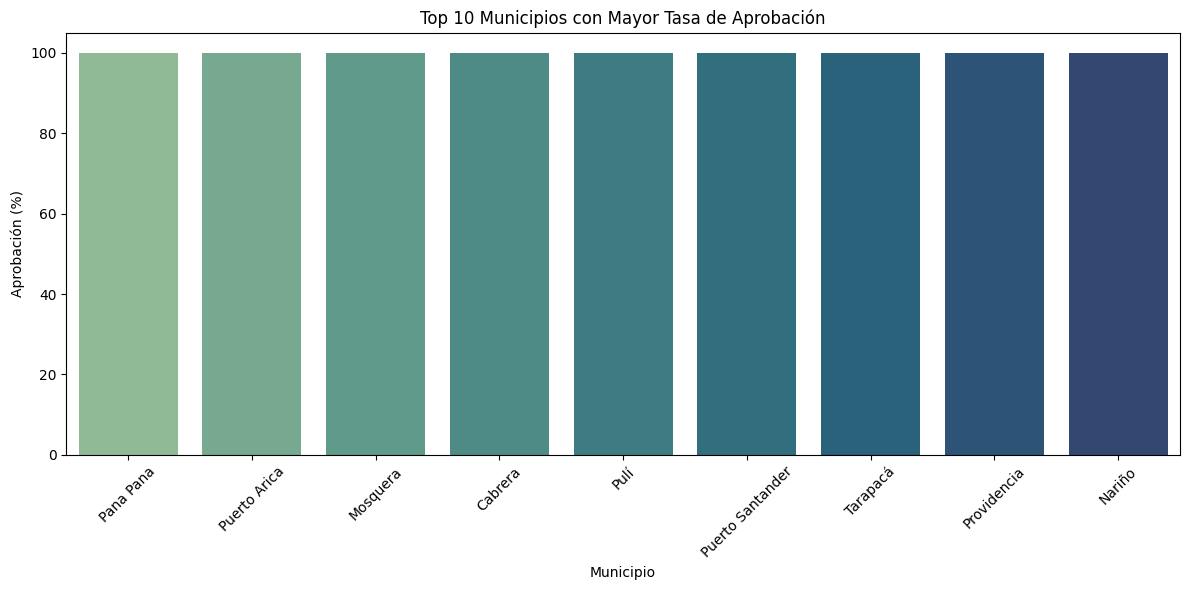

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_aprobacion, x='nombre_municipio', y='aprobacion', palette='crest')
plt.title('Top 10 Municipios con Mayor Tasa de Aprobación')
plt.xticks(rotation=45)
plt.ylabel('Aprobación (%)')
plt.xlabel('Municipio')
plt.tight_layout()
plt.show()

¿Cómo compararía el rendimiento educativo por municipios?

In [61]:
# Municipios con mayor repitencia media
top_repitencia = (
    resumen_rendimiento_municipal
    .sort_values(by='tasa_repitencia_media', ascending=False)
    .head(10)
)
top_repitencia[['nombre_municipio', 'a_o', 'tasa_repitencia_media']]

,nombre_municipio,a_o,tasa_repitencia_media
2246,Norosi,2021,36.45
14286,Tarapacá,2023,31.58
14269,Puerto Santander,2019,31.25
12204,Chalán,2021,23.33
14347,Puerto Colombia,2023,23.08
6784,Venecia,2022,22.61
2621,Betéitiva,2019,21.95
8404,El Molino,2017,21.65
14188,La Pedrera,2016,20.00
10295,El Carmen,2023,20.00


In [ ]:
# Municipios con menor repitencia media
menor_repitencia = (
    resumen_rendimiento_municipal
    .sort_values(by='tasa_repitencia_media', ascending=True)
    .head(10)
)

# Visualizamos los resultados
menor_repitencia[['nombre_municipio', 'a_o', 'tasa_repitencia_media']]

,nombre_municipio,a_o,tasa_repitencia_media
15,Abejorral,2013,0.0
14569,Cumaribo,2011,0.0
14556,Santa Rosalía,2011,0.0
14557,Santa Rosalía,2012,0.0
14559,Santa Rosalía,2014,0.0
34,Abriaquí,2019,0.0
36,Abriaquí,2021,0.0
11421,Galán,2018,0.0
11422,Galán,2019,0.0
11427,Gambita,2011,0.0


In [65]:
# Municipios con mayor repitencia
mayor_repitencia_mpios = resumen_rendimiento_municipal.query("nombre_municipio in ['Norosi', 'Tarapacá', 'Puerto Santander', 'Chalán', 'Puerto Colombia', 'Venecia', 'Betéitiva', 'El Molino', 'La Pedrera', 'El Carmen']")

# Municipios con menor repitencia
menor_repitencia_mpios = resumen_rendimiento_municipal.query("nombre_municipio in ['Abejorral', 'Cumaribo', 'Santa Rosalía', 'Abriaquí', 'Galán', 'Gambita']")

In [73]:
comparativo_repitencia.columns.to_list()

['codigo_municipio',
 'nombre_municipio',
 'a_o',
 'aprobacion',
 'reprobacion',
 'desercion',
 'tasa_repitencia_total',
 'tasa_repitencia_primaria',
 'tasa_repitencia_secundaria',
 'tasa_repitencia_media',
 'grupo']

In [75]:
# Primero aseguramos que 'codigo_municipio', 'nombre_municipio', y 'a_o' están en ambos DataFrames
comparativo_repitencia = comparativo_repitencia.merge(
    df_merged[['codigo_municipio', 'nombre_municipio', 'a_o', 'cobertura_neta_total']],
    on=['codigo_municipio', 'nombre_municipio', 'a_o'],
    how='left'
)

In [76]:
cols_interes = [
    'nombre_municipio',
    'a_o',
    'aprobacion',
    'desercion',
    'cobertura_neta_total',
    'tasa_repitencia_media',
    'grupo'
]

tabla_comparativa = comparativo_repitencia[cols_interes]

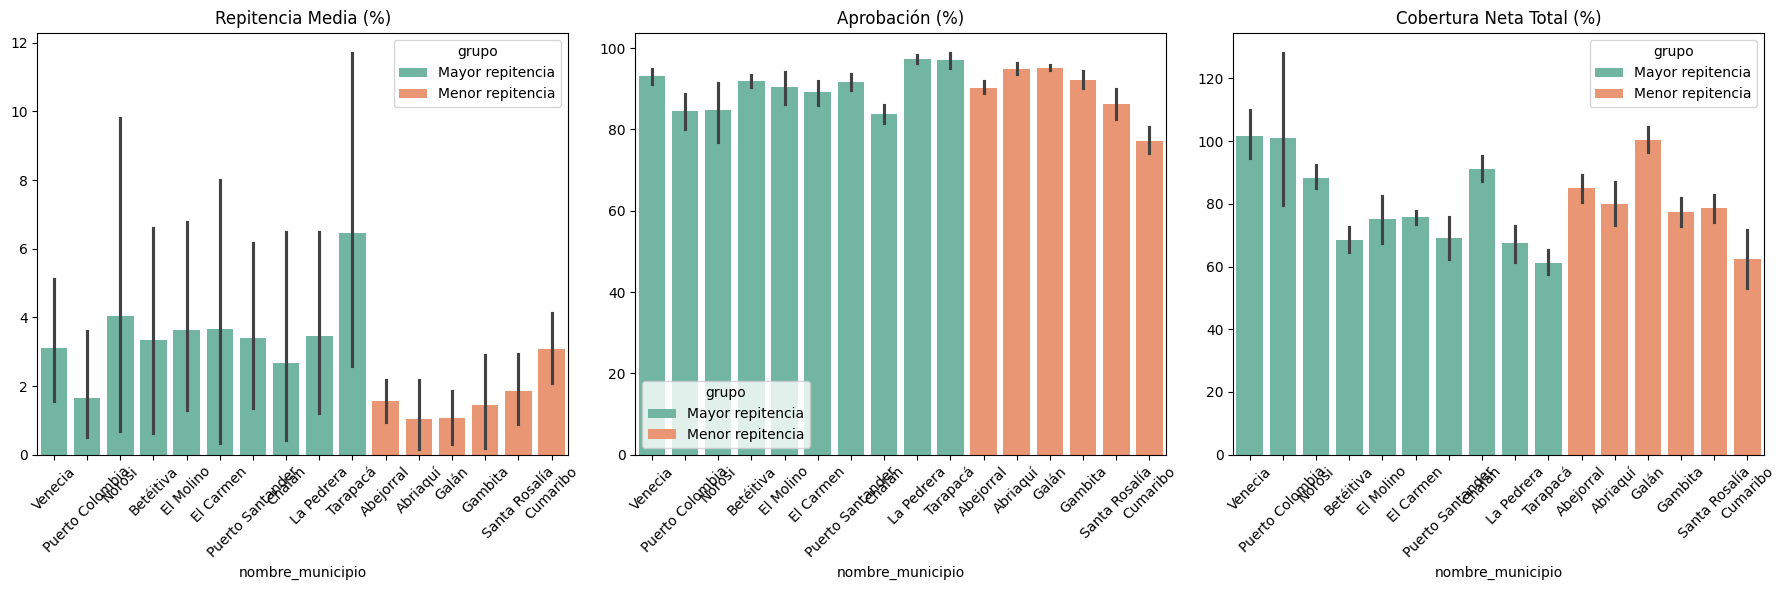

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# REPITENCIA
sns.barplot(data=tabla_comparativa, x='nombre_municipio', y='tasa_repitencia_media',
            hue='grupo', ax=axes[0], palette='Set2')
axes[0].set_title('Repitencia Media (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('')

# APROBACIÓN
sns.barplot(data=tabla_comparativa, x='nombre_municipio', y='aprobacion',
            hue='grupo', ax=axes[1], palette='Set2')
axes[1].set_title('Aprobación (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('')

# COBERTURA
sns.barplot(data=tabla_comparativa, x='nombre_municipio', y='cobertura_neta_total',
            hue='grupo', ax=axes[2], palette='Set2')
axes[2].set_title('Cobertura Neta Total (%)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

El análisis comparativo entre municipios con alta y baja repitencia reveló contrastes claros en el rendimiento educativo. Municipios como Norosí y Tarapacá mostraron niveles críticos de repitencia y aprobación baja, mientras que Abejorral y Santa Rosalía destacaron por tener repitencia nula, mejor aprobación y cobertura más estable.
La visualización triple confirmó que el rendimiento escolar es multidimensional y requiere evaluar no solo logros académicos, sino también rezago y acceso educativo. Esta comparación territorial permite identificar zonas críticas y territorios modelo para enfocar esfuerzos.


In [78]:
# Resumen de cobertura por departamento
resumen_cobertura_departamento = (
    df_merged
    .groupby(['nombre_departamento', 'a_o'])[
        ['cobertura_neta_total', 'cobertura_neta_primaria', 'cobertura_neta_secundaria']
    ]
    .mean()
    .reset_index()
)

In [81]:
top_cobertura = (
    resumen_cobertura_departamento
    .sort_values(by='cobertura_neta_total', ascending=False)
    .head(10)
)

In [ ]:
resumen_departamento = (
    df_merged.groupby('nombre_departamento')[['cobertura_neta_total']].mean().reset_index()
)

top_cobertura = resumen_departamento.sort_values(by='cobertura_neta_total', ascending=False).head(10)

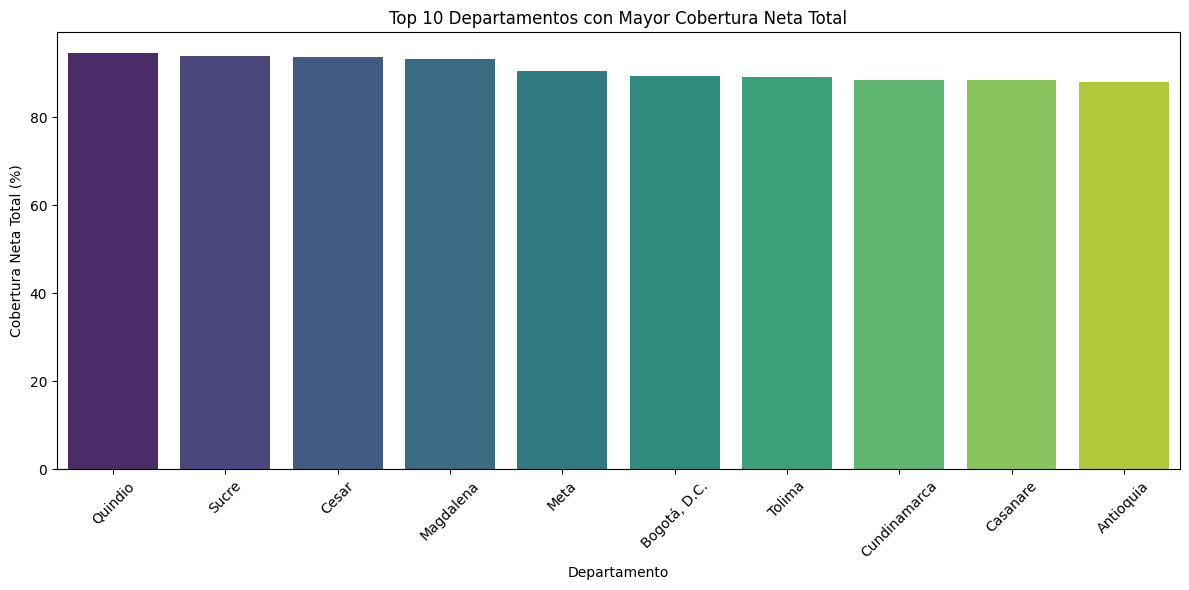

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_cobertura,
    x='nombre_departamento',
    y='cobertura_neta_total',
    hue='nombre_departamento',  # Se especifica hue explícitamente
    palette='viridis',
    legend=False  # Desactiva leyenda que sería redundante
)
plt.title('Top 10 Departamentos con Mayor Cobertura Neta Total')
plt.xticks(rotation=45)
plt.ylabel('Cobertura Neta Total (%)')
plt.xlabel('Departamento')
plt.tight_layout()
plt.show()

El análisis agrupado por departamento muestra que territorios como Quindío, Sucre, Cesar y Magdalena lideran en cobertura neta total, superando el 85%. Esto indica una capacidad sólida del sistema educativo para incorporar y retener estudiantes en edad escolar.
La visualización refuerza que los departamentos con mejor cobertura tienden a mantener consistencia interanual, lo que los convierte en referentes regionales de acceso educativo. Este ranking permite identificar zonas prioritarias y territorios ejemplares para orientar políticas públicas.

# Conclusión general del análisis educativo

A través del modelo estrella, se abordaron tres dimensiones clave del sistema educativo colombiano: el rendimiento por municipio, la cobertura por departamento y los contrastes entre territorios con rezago y buen desempeño.

- Se evidenció que el rendimiento escolar es multidimensional, y requiere cruzar indicadores como aprobación, repitencia y cobertura.
- La comparación territorial permitió identificar zonas críticas (como Norosí y Tarapacá) que necesitan intervención, y territorios ejemplares (como Abejorral y Galán) que destacan por desempeño integral.
- A nivel departamental, entidades como Quindío, Sucre y Cesar sobresalieron por sus niveles elevados de cobertura neta total, reflejando mayor acceso educativo.
  
Este recorrido analítico respalda la importancia de contar con datos integrados y visualizaciones comparativas para orientar decisiones informadas y promover equidad educativa en Colombia.
